In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras import datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
label = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat',
         'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

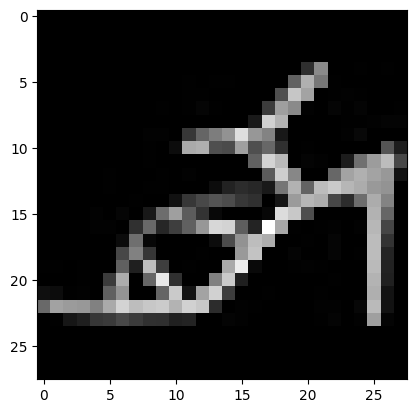

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  47 138   0   0   1   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   1   1   0   0   0
    0  98 176 119   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0
   79 198 163   0   1   2   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   1   5   1   0   0   0  61
  159 138   2   0   5   1   4   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

In [4]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray')
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

In [5]:
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
x_train = X_train / 255.0
x_test = X_test / 255.0
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
print(x_train.shape)
# print(x_train[0])

(60000, 28, 28, 1)


In [18]:
model = Sequential()
model.add(Conv2D(64, input_shape=(28, 28, 1), activation='relu',
                kernel_size=(3, 3), padding='same'))
model.add(MaxPool2D(padding='same', pool_size=(2, 2)))
model.add(Conv2D(16, activation='relu',
                kernel_size=(3, 3), padding='same'))
model.add(MaxPool2D(padding='same', pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        9232      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dropout_2 (Dropout)         (None, 784)              

In [19]:
opt = Adam(learning_rate=0.01)
model.compile(opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
fit_hist = model.fit(x_train, y_train, batch_size=256,
          epochs=15, validation_split=0.2, verbose=1)

Epoch 1/15
188/188 [==============================] - 70s 367ms/step - loss: 0.5580 - accuracy: 0.7915 - val_loss: 0.3746 - val_accuracy: 0.8559
Epoch 2/15
188/188 [==============================] - 65s 347ms/step - loss: 0.3688 - accuracy: 0.8640 - val_loss: 0.3078 - val_accuracy: 0.8830
Epoch 3/15
188/188 [==============================] - 65s 347ms/step - loss: 0.3337 - accuracy: 0.8766 - val_loss: 0.3016 - val_accuracy: 0.8878
Epoch 4/15
188/188 [==============================] - 65s 348ms/step - loss: 0.3107 - accuracy: 0.8839 - val_loss: 0.2808 - val_accuracy: 0.8938
Epoch 5/15
188/188 [==============================] - 64s 343ms/step - loss: 0.2971 - accuracy: 0.8890 - val_loss: 0.2905 - val_accuracy: 0.8900
Epoch 6/15
188/188 [==============================] - 69s 365ms/step - loss: 0.2870 - accuracy: 0.8931 - val_loss: 0.2686 - val_accuracy: 0.9012
Epoch 7/15
188/188 [==============================] - 66s 350ms/step - loss: 0.2800 - accuracy: 0.8961 - val_loss: 0.2643 - val_ac

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('accuracy', score[1])

accuracy 0.9010999798774719


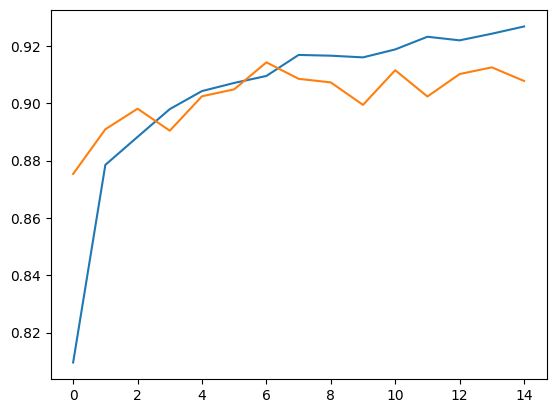

In [15]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

coat
1/1 [==============================] - 0s 85ms/step
[[8.0881885e-11 1.2359935e-13 2.4255130e-05 1.1306648e-13 9.9997532e-01
  5.3151524e-21 4.7486111e-07 9.2068272e-24 1.0738565e-12 4.0475275e-18]]
coat


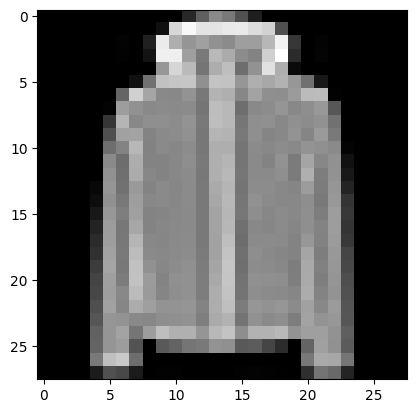

In [17]:
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap='gray')
print(label[Y_test[my_sample]])
pred = model.predict(x_test[my_sample].reshape(-1, 28, 28, 1))
print(pred)
print(label[np.argmax(pred)])